# Introduction to Pandas

*Written by Luke Chang & Jin Cheong*

Analyzing data requires being facile with manipulating and transforming datasets to be able to test specific hypotheses. Data come in all different types of flavors and there are many different tools in the Python ecosystem to work with pretty much any type of data you might encounter. For example, you might be interested in working with functional neuroimaging data that is four dimensional. Three dimensional matrices contain brain activations in space, and these data can change over time in the 4th dimension. This type of data is well suited for [numpy](https://numpy.org/) and specialized brain imaging packages such as [nilearn](https://nilearn.github.io/). The majority of data, however, is typically in some version of a two-dimensional observations by features format as might be seen in an excel spreadsheet, a SQL table, or in a comma delimited format (i.e., csv). 

In Python, the [Pandas](https://pandas.pydata.org/) library is a powerful tool to work with this type of data. This is a very large library with a tremendous amount of functionality. In this tutorial, we will cover the basics of how to load and manipulate data and will focus on common to data munging tasks.

For those interested in diving deeper into Pandas, there are many online resources. There is the [Pandas online documention](https://pandas.pydata.org/), [stackoverflow](https://stackoverflow.com/questions/tagged/pandas), and [medium blogposts](https://medium.com/search?q=pandas). I highly recommend  Jake Vanderplas's terrific [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).   In addition, here is a brief [video](https://neurohackademy.org/course/complex-data-structures/) by Tal Yarkoni providing a useful introduction to pandas. 

After the tutorial you will have the chance to apply the methods to a new set of data. 

## Pandas Objects

Pandas has several objects that are commonly used (i.e., Series, DataFrame, Index). At it's core, Pandas Objects are enhanced numpy arrays where columns and rows can have special names and there are lots of methods to operate on the data. See Jake Vanderplas's [tutorial](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.01-Introducing-Pandas-Objects.ipynb) for a more in depth overview.

### Series
A pandas `Series` is a one-dimensional array of indexed data.

In [1]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5])
data

0    1
1    2
2    3
3    4
4    5
dtype: int64

The indices can be integers like in the example above. Alternatively, the indices can be labels.

In [2]:
data = pd.Series([1,2,3], index=['a', 'b', 'c'])
data

a    1
b    2
c    3
dtype: int64

Also, `Series` can be easily created from dictionaries

In [3]:
data = pd.Series({'A':5, 'B':3, 'C':1})
data

A    5
B    3
C    1
dtype: int64

### DataFrame
If a `Series` is a one-dimensional indexed array, the `DataFrame` is a two-dimensional indexed array. It can be thought of as a collection of Series objects, where each Series represents a column, or as an enhanced 2D numpy array. 

In a `DataFrame`, the index refers to labels for each row, while columns describe each column.

First, let's create a `DataFrame` using random numbers generated from numpy.

In [4]:
import numpy as np

data = pd.DataFrame(np.random.random((5, 3)))
data

,0,1,2
0,0.828627,0.860628,0.239354
1,0.701561,0.990040,0.955123
2,0.526356,0.573977,0.854763
3,0.360077,0.396195,0.303766
4,0.188879,0.446423,0.063622


We could also initialize with column names

In [5]:
data = pd.DataFrame(np.random.random((5, 3)), columns=['A', 'B', 'C'])
data

,A,B,C
0,0.493188,0.513151,0.500130
1,0.706082,0.967668,0.762955
2,0.853237,0.361205,0.297108
3,0.021289,0.920400,0.609904
4,0.917379,0.207424,0.451640


Alternatively, we could create a `DataFrame` from multiple `Series` objects.

In [6]:
a = pd.Series([1, 2, 3, 4])
b = pd.Series(['a', 'b', 'c', 'd'])
data = pd.DataFrame({'Numbers':a, 'Letters':b})
data

,Numbers,Letters
0,1,a
1,2,b
2,3,c
3,4,d


Or a python dictionary

In [7]:
data = pd.DataFrame({'State':['California', 'Colorado', 'New Hampshire'], 
                     'Capital':['Sacremento', 'Denver', 'Concord']})
data

,State,Capital
0,California,Sacremento
1,Colorado,Denver
2,New Hampshire,Concord


## Loading Data
Loading data is fairly straightfoward in Pandas. Type `pd.read` then press tab to see a list of functions that can load specific file formats such as: csv, excel, spss, and sql. 

In this example, we will use `pd.read_csv` to load a .csv file into a dataframe. 
Note that read_csv() has many options that can be used to make sure you load the data correctly. You can explore the docstrings for a function to get more information about the inputs and general useage guidelines by running `pd.read_csv?` 

In [8]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

To load a csv file we will need to specify either the relative or absolute path to the file.

The command `pwd` will print the path of the current working directory.

In [9]:
pwd

'/Users/lukechang/Github/dartbrains/content'

We will now load the Pandas has many ways to read data different data formats into a dataframe.  Here we will use the `pd.read_csv` function.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ljchang/dartbrains/master/data/salary/salary.csv', sep = ',')

### Ways to check the dataframe
There are many ways to examine your dataframe. One easy way is to just call the dataframe variable itself. 

In [11]:
df

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23
...,...,...,...,...,...,...
72,53662,1,neuro,1.0,31.0,3
73,57185,1,stat,9.0,39.0,7
74,52254,1,stat,2.0,32.0,9
75,61885,1,math,23.0,60.0,9


However, often the dataframes can be large and we may be only interested in seeing the first few rows.  `df.head()` is useful for this purpose.

In [12]:
df.head()

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23


On the top row, you have column names, that can be called like a dictionary (a dataframe can be essentially thought of as a dictionary with column names as the keys). The left most column (0,1,2,3,4...) is called the index of the dataframe. The default index is sequential integers, but it can be set to anything as long as each row is unique (e.g., subject IDs)

In [13]:
print("Indexes")
print(df.index)
print("Columns")
print(df.columns)
print("Columns are like keys of a dictionary")
print(df.keys())

Indexes
RangeIndex(start=0, stop=77, step=1)
Columns
Index(['salary', 'gender', 'departm', 'years', 'age', 'publications'], dtype='object')
Columns are like keys of a dictionary
Index(['salary', 'gender', 'departm', 'years', 'age', 'publications'], dtype='object')


You can access the values of a column by calling it directly. Single bracket returns a `Series` and double bracket returns a `dataframe`.

Let's return the first 10 rows of salary.

In [14]:
df['salary'][:10]

0    86285
1    77125
2    71922
3    70499
4    66624
5    64451
6    64366
7    59344
8    58560
9    58294
Name: salary, dtype: int64

`shape` is another useful method for getting the dimensions of the matrix.  

We will print the number of rows and columns in this data set using fstring formatting. First, you need to specify a string starting with 'f', like this `f'anything'`. It is easy to insert variables with curly brackets like this `f'rows: {rows}'`. 

[Here](https://realpython.com/python-f-strings/) is more info about formatting text.

In [15]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in this data set') 

There are 77 rows and 6 columns in this data set


### Describing the data
We can use the `.describe()` method to get a quick summary of the continuous values of the data frame. We will `.transpose()` the output to make it slightly easier to read. 

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,77.0,67748.519481,15100.581435,44687.0,57185.0,62607.0,75382.0,112800.0
gender,77.0,0.142857,0.387783,0.0,0.0,0.0,0.0,2.0
years,76.0,14.973684,8.617770,1.0,8.0,14.0,23.0,34.0
age,76.0,45.486842,9.005914,31.0,38.0,44.0,53.0,65.0
publications,77.0,21.831169,15.240530,3.0,9.0,19.0,33.0,72.0


We can also get quick summary of a pandas series, or specific column of a pandas dataframe.

In [17]:
df.departm.describe()

count      77
unique      7
top       bio
freq       16
Name: departm, dtype: object

Sometimes, you will want to know how many data points are associated with a specific variable for categorical data. The `value_counts` method can be used for this goal.

For example, how many males and females are in this dataset?  

In [18]:
df['gender'].value_counts()

gender
0    67
1     9
2     1
Name: count, dtype: int64

You can see that there are more than 2 genders specified in our data. 

This is likely an error in the data collection process. It's always up to the data analyst to decide what to do in these cases. Because we don't know what the true value should have been, let's just remove the row from the dataframe by finding all rows that are not '2'.

In [19]:
df = df.loc[df['gender']!=2]

df['gender'].value_counts()

gender
0    67
1     9
Name: count, dtype: int64

### Dealing with missing values
Data are always messy and often have lots of missing values. There are many different ways, in which missing data might present `NaN`, `None`, or `NA`, Sometimes researchers code missing values with specific numeric codes such as 999999. It is important to find these as they can screw up your analyses if they are hiding in your data. 

If the missing values are using a standard pandas or numpy value such as `NaN`, `None`, or `NA`, we can identify where the missing values are as booleans using the `isnull()` method. 

The `isnull()` method will return a dataframe with True/False values on whether a datapoint is null or not a number (nan).

In [20]:
df.isnull()

,salary,gender,departm,years,age,publications
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
72,False,False,False,False,False,False
73,False,False,False,False,False,False
74,False,False,False,False,False,False
75,False,False,False,False,False,False


Suppose we wanted to count the number of missing values for each column in the dataset.

One thing that is  nice about Python is that you can chain commands, which means that the output of one method can be the input into the next method.  This allows us to write intuitive and concise code.  Notice how we take the `sum()` of all of the null cases.
We can chain the `.null()` and `.sum()` methods to see how many null values are added up in each column.

In [21]:
df.isnull().sum()

salary          0
gender          0
departm         0
years           1
age             1
publications    0
dtype: int64

You can use the boolean indexing once again to see the datapoints that have missing values. We chained the method `.any()` which will check if there are any True values for a given axis.  Axis=0 indicates rows, while Axis=1 indicates columns.  So here we are creating a boolean index for row where *any* column has a missing value.

In [22]:
df[df.isnull().any(axis=1)]

,salary,gender,departm,years,age,publications
18,64762,0,chem,25.0,NaN,29
24,104828,0,geol,NaN,50.0,44


You may look at where the values are not null. Note that indexes 18, and 24 are missing. 

In [23]:
df[~df.isnull().any(axis=1)]

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23
...,...,...,...,...,...,...
72,53662,1,neuro,1.0,31.0,3
73,57185,1,stat,9.0,39.0,7
74,52254,1,stat,2.0,32.0,9
75,61885,1,math,23.0,60.0,9


There are different techniques for dealing with missing data.  An easy one is to simply remove rows that have any missing values using the `dropna()` method.

In [24]:
df.dropna(inplace=True)

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Now we can check to make sure the missing rows are removed.  Let's also check the new dimensions of the dataframe.

In [25]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in this data set') 

df.isnull().sum()

There are 74 rows and 6 columns in this data set


salary          0
gender          0
departm         0
years           0
age             0
publications    0
dtype: int64

### Create New Columns
You can create new columns to fit your needs. 
For instance you can set initialize a new column with zeros. 

In [26]:
df['pubperyear'] = 0

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/2945664157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pubperyear'] = 0


Here we can create a new column pubperyear, which is the ratio of the number of papers published per year

In [27]:
df['pubperyear'] = df['publications']/df['years']

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/1818352125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pubperyear'] = df['publications']/df['years']


## Indexing and slicing Data

Indexing in Pandas can be tricky. There are many ways to index in pandas, for this tutorial we will focus on four: loc, iloc, boolean, and indexing numpy values. For a more in depth overview see Jake Vanderplas's tutorial](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.02-Data-Indexing-and-Selection.ipynb), where he also covers more advanced topics, such as [hierarchical indexing](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.05-Hierarchical-Indexing.ipynb). 

### Indexing with Keys
First, we will cover indexing with keys using the `.loc` method. This method references the explicit index with a key name. It works for both index names and also column names. Note that often the keys for rows are integers by default.

In this example, we will return rows 10-20 on the salary column.

In [28]:
df.loc[10:20, 'salary']

10    56092
11    54452
12    54269
13    55125
14    97630
15    82444
16    76291
17    75382
19    62607
20    60373
Name: salary, dtype: int64

You can return multiple columns using a list.

In [29]:
df.loc[:10, ['salary', 'publications']]

,salary,publications
0,86285,72
1,77125,43
2,71922,23
3,70499,64
4,66624,23
5,64451,44
6,64366,22
7,59344,11
8,58560,8
9,58294,12


### Indexing with Integers
Next we wil try `.iloc`.  This method references the implicit python index using integer indexing (starting from 0, exclusive of last number).  You can think of this like row by column indexing using integers.

For example, let's grab the first 3 rows and columns.

In [30]:
df.iloc[0:3, 0:3]

,salary,gender,departm
0,86285,0,bio
1,77125,0,bio
2,71922,0,bio


Let's make a new data frame with just Males and another for just Females. Notice, how we added the `.reset_index(drop=True)` method?   This is because assigning a new dataframe based on indexing another dataframe will retain the *original* index.  We need to explicitly tell pandas to reset the index if we want it to start from zero.

In [31]:
male_df = df[df.gender == 0].reset_index(drop=True)
female_df = df[df.gender == 1].reset_index(drop=True)

### Indexing with booleans

Boolean or logical indexing is useful if you need to sort the data based on some True or False value.  

For instance, who are the people with salaries greater than 90K but lower than 100K ?

In [32]:
df[ (df.salary > 90000) & (df.salary < 100000)]

,salary,gender,departm,years,age,publications,pubperyear
14,97630,0,chem,34.0,64.0,43,1.264706
30,92951,0,neuro,11.0,41.0,20,1.818182
54,96936,0,physics,15.0,50.0,17,1.133333


This also works with the `.loc` method, which is what you need to do if you want to return specific columns

In [33]:
df.loc[ (df.salary > 90000) & (df.salary < 100000), ['salary', 'gender']]

,salary,gender
14,97630,0
30,92951,0
54,96936,0


### Numpy indexing

Finally, you can also return a numpy matrix from a pandas data frame by accessing the `.values` property. This returns a numpy array that can be indexed using numpy integer indexing and slicing.

As an example, let's grab the last 10 rows and the first 3 columns.

In [34]:
df.values[-10:, :3]

array([[53638, 0, 'math'],
       [59139, 1, 'bio'],
       [52968, 1, 'bio'],
       [55949, 1, 'chem'],
       [58893, 1, 'neuro'],
       [53662, 1, 'neuro'],
       [57185, 1, 'stat'],
       [52254, 1, 'stat'],
       [61885, 1, 'math'],
       [49542, 1, 'math']], dtype=object)

## Renaming
Part of cleaning up the data is renaming with more sensible names. This is easy to do with Pandas.

### Renaming Columns
We can rename columns with the `.rename` method by passing in a dictionary using the `{'Old Name':'New Name'}`. We either need to assigne the result to a new variable or add `inplace=True`.

In [35]:
df.rename({'departm':'department','pubperyear':'pub_per_year'}, axis=1, inplace=True)

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/144029972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'departm':'department','pubperyear':'pub_per_year'}, axis=1, inplace=True)


### Renaming Rows
Often we may want to change the coding scheme for a variable. For example, it is hard to remember what zeros and ones mean in the gender variable. We can make this easier by changing these with a dictionary `{0:'male', 1:'female'}` with the `replace` method. We can do this `inplace=True` or we can assign it to a new variable. As an example, we will assign this to a new variable to also retain the original lablels.

In [36]:
df['gender_name'] = df['gender'].replace({0:'male', 1:'female'})

df.head()

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/1691057888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_name'] = df['gender'].replace({0:'male', 1:'female'})


,salary,gender,department,years,age,publications,pub_per_year,gender_name
0,86285,0,bio,26.0,64.0,72,2.769231,male
1,77125,0,bio,28.0,58.0,43,1.535714,male
2,71922,0,bio,10.0,38.0,23,2.300000,male
3,70499,0,bio,16.0,46.0,64,4.000000,male
4,66624,0,bio,11.0,41.0,23,2.090909,male


## Operations
One of the really fun things about pandas once you get the hang of it is how easy it is to perform operations on the data. It is trivial to compute simple summaries of the data. We can also leverage the object-oriented nature of a pandas object, we can chain together multiple commands.

For example, let's grab the mean of a few columns.

In [37]:
df.loc[:,['years', 'age', 'publications']].mean()

years           14.972973
age             45.567568
publications    21.662162
dtype: float64

We can also turn these values into a plot with the `plot` method, which we will cover in more detail in future tutorials.

<Axes: >

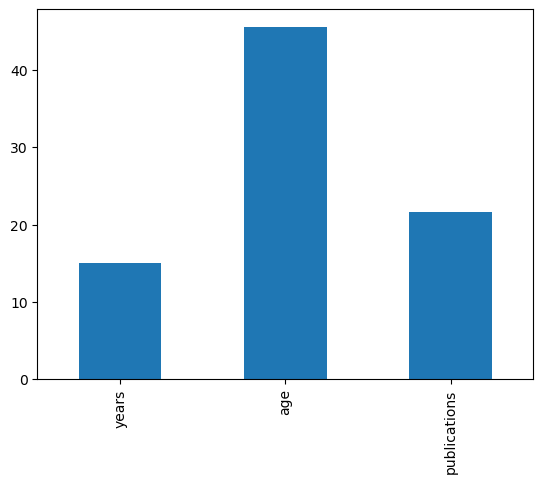

In [38]:
%matplotlib inline

df.loc[:,['years', 'age', 'publications']].mean().plot(kind='bar')

Perhaps we want to see if there are any correlations in our dataset. We can do this with the `.corr` method. More recent versions of Pandas might produce an error if there are any columns containing string data. To avoid this issue set `numeric_only=True`.

In [41]:
df.corr(numeric_only=True)

,salary,gender,years,age,publications,pub_per_year
salary,1.000000,-0.300071,0.303275,0.275534,0.427426,-0.016988
gender,-0.300071,1.000000,-0.275468,-0.277098,-0.249410,0.024210
years,0.303275,-0.275468,1.000000,0.958181,0.323965,-0.541125
age,0.275534,-0.277098,0.958181,1.000000,0.328285,-0.498825
publications,0.427426,-0.249410,0.323965,0.328285,1.000000,0.399865
pub_per_year,-0.016988,0.024210,-0.541125,-0.498825,0.399865,1.000000


## Merging Data
Another common data manipulation goal is to merge datasets. There are multiple ways to do this in pandas, we will cover concatenation, append, and merge.

### Concatenation
Concatenation describes the process of *stacking* dataframes together. Older versions of pandas also had an `.append()` method, which has been deprecated since pandas 1.4. The main thing to consider is to make sure that the shapes of the two dataframes are the same as well as the index labels. For example, if we wanted to vertically stack two dataframe, they need to have the same column names. 

Remember that we previously created two separate dataframes for males and females?  Let's put them back together using the `pd.concat` method. Note how the index of this output retains the old index.

In [42]:
combined_data = pd.concat([female_df, male_df], axis = 0)

We can reset the index using the `reset_index` method.

In [43]:
pd.concat([male_df, female_df], axis = 0).reset_index(drop=True)

,salary,gender,departm,years,age,publications,pubperyear
0,86285,0,bio,26.0,64.0,72,2.769231
1,77125,0,bio,28.0,58.0,43,1.535714
2,71922,0,bio,10.0,38.0,23,2.300000
3,70499,0,bio,16.0,46.0,64,4.000000
4,66624,0,bio,11.0,41.0,23,2.090909
...,...,...,...,...,...,...,...
69,53662,1,neuro,1.0,31.0,3,3.000000
70,57185,1,stat,9.0,39.0,7,0.777778
71,52254,1,stat,2.0,32.0,9,4.500000
72,61885,1,math,23.0,60.0,9,0.391304


We can also concatenate columns in addition to rows. Make sure that the number of rows are the same in each dataframe. For this example, we will just create two new data frames with a subset of the columns and then combine them again.

In [44]:
df1 = df[['salary', 'gender']]
df2 = df[['age', 'publications']]
df3 = pd.concat([df1, df2], axis=1)
df3.head()

,salary,gender,age,publications
0,86285,0,64.0,72
1,77125,0,58.0,43
2,71922,0,38.0,23
3,70499,0,46.0,64
4,66624,0,41.0,23


### Merge
The most powerful method of merging data is using the `pd.merge` method. This allows you to merge datasets of different shapes and sizes on specific variables that match. This is very common when you need to merge multiple sql tables together for example. 

In this example, we are creating two separate data frames that have different states and columns and will merge on the `State` column.

First, we will only retain rows where there is a match across dataframes, using `how=inner`. This is equivalent to an 'and' join in sql.

In [46]:
df1 = pd.DataFrame({'State':['California', 'Colorado', 'New Hampshire'], 
                    'Capital':['Sacremento', 'Denver', 'Concord']})
df2 = pd.DataFrame({'State':['California', 'New Hampshire', 'New York'], 
                    'Population':['39512223', '1359711', '19453561']})

df3 = pd.merge(left=df1, right=df2, on='State', how='inner')
df3

,State,Capital,Population
0,California,Sacremento,39512223
1,New Hampshire,Concord,1359711


Notice how there are only two rows in the merged dataframe.

We can also be more inclusive and match on `State` column, but retain all rows. This is equivalent to an 'or' join.

In [47]:
df3 = pd.merge(left=df1, right=df2, on='State', how='outer')
df3

,State,Capital,Population
0,California,Sacremento,39512223
1,Colorado,Denver,NaN
2,New Hampshire,Concord,1359711
3,New York,NaN,19453561


This is a very handy way to merge data when you have lots of files with missing data.  See Jake Vanderplas's [tutorial](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.07-Merge-and-Join.ipynb) for a more in depth overview.

## Grouping
We've seen above that it is very easy to summarize data over columns using the builtin functions such as `pd.mean()`. Sometimes we are interested in summarizing data over different groups of rows. For example, what is the mean of participants in Condition A compared to Condition B?

This is suprisingly easy to compute in pandas using the `groupby` operator, where we aggregate data using a specific operation over different labels.

One useful way to conceptualize this is using the **Split, Apply, Combine** operation (similar to map-reduce).

![](../images/pandas/split-apply-combine.png)

This figure is taken from Jake Vanderplas's tutorial and highlights how input data can be *split* on some key and then an operation such as sum can be *applied* separately to each split. Finally, the results of the applied function for each key can be *combined* into a new data frame.

### Groupby
In this example, we will use the `groupby` operator to split the data based on gender labels and separately calculate the mean for each group. Note that newer versions of pandas might throw an error if you try to perform a numeric computation such as `.mean()` on a dataframe containing columns of string data. Use the flag `numeric_only=True` to avoid this issue.

In [49]:
df.groupby('gender_name').mean(numeric_only=True)

,salary,gender,years,age,publications,pub_per_year
gender_name,,,,,,
female,55719.666667,1.0,8.666667,38.888889,11.555556,2.043170
male,69108.492308,0.0,15.846154,46.492308,23.061538,1.924709


Other default aggregation methods include `.count()`, `.mean()`, `.median()`, `.min()`, `.max()`, `.std()`, `.var()`, and `.sum()`

### Transform
While the split, apply, combine operation that we just demonstrated is extremely usefuly to quickly summarize data based on a grouping key, the resulting data frame is compressed to one row per grouping label.

Sometimes, we would like to perform an operation over groups, but retain the original data shape. One common example is standardizing data within a subject or grouping variable. Normally, you might think to loop over subject ids and separately z-score or center a variable and then recombine the subject data using a vertical concatenation operation.

The `transform` method in pandas can make this much easier and faster!

Suppose we want to compute the standardized salary separately for each department. We can standardize using a z-score which requires subtracting the departmental mean from each professor's salary in that department, and then dividing it by the departmental standard deviation. 

We can do this by using the `groupby(key)` method chained with the `.transform(function)` method. It will group the dataframe by the key column, perform the "function" transformation of the data and return data in same format. We can then assign the results to a new column in the dataframe.

In [58]:
df['salary_dept_z'] = (df['salary'] - df['salary'].groupby(df['department']).transform('mean'))/df['salary'].groupby(df['department']).transform('std')
df.head()

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/2225281835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_dept_z'] = (df['salary'] - df['salary'].groupby(df['department']).transform('mean'))/df['salary'].groupby(df['department']).transform('std')


,salary,gender,department,years,age,publications,pub_per_year,gender_name,salary_dept_z
0,86285,0,bio,26.0,64.0,72,2.769231,male,2.468065
1,77125,0,bio,28.0,58.0,43,1.535714,male,1.493198
2,71922,0,bio,10.0,38.0,23,2.300000,male,0.939461
3,70499,0,bio,16.0,46.0,64,4.000000,male,0.788016
4,66624,0,bio,11.0,41.0,23,2.090909,male,0.375613


This worked well, but is also pretty verbose. We can simplify the syntax a little bit more using a `lambda` function, where we can define the zscore function.

In [59]:
calc_zscore = lambda x: (x - x.mean()) / x.std()

df['salary_dept_z'] = df['salary'].groupby(df['department']).transform(calc_zscore)

df.head()

/var/folders/5b/m183lc3x27n9krrzz85z2x1c0000gn/T/ipykernel_28379/94412960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_dept_z'] = df['salary'].groupby(df['department']).transform(calc_zscore)


,salary,gender,department,years,age,publications,pub_per_year,gender_name,salary_dept_z
0,86285,0,bio,26.0,64.0,72,2.769231,male,2.468065
1,77125,0,bio,28.0,58.0,43,1.535714,male,1.493198
2,71922,0,bio,10.0,38.0,23,2.300000,male,0.939461
3,70499,0,bio,16.0,46.0,64,4.000000,male,0.788016
4,66624,0,bio,11.0,41.0,23,2.090909,male,0.375613


For a more in depth overview of data aggregation and grouping, check out Jake Vanderplas's [tutorial](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

## Reshaping Data
The last topic we will cover in this tutorial is reshaping data. Data is often in the form of observations by features, in which there is a single row for each independent observation of data and a separate column for each feature of the data. This is commonly referred to as as the *wide* format. However, when running regression or plotting in libraries such as seaborn, we often want our data in the *long* format, in which each grouping variable is specified in a separate column.

In this section we cover how to go from wide to long using the `melt` operation and from long to wide using the `pivot` function.

### Melt
To `melt` a dataframe into the long format, we need to specify which variables are the `id_vars`, which ones should be combined into a `value_var`, and finally, what we should label the column name for the `value_var`, and also for the `var_name`. We will call the values 'Ratings' and variables 'Condition'.

First, we need to create a dataset to play with.

In [60]:
data = pd.DataFrame(np.vstack([np.arange(1,6), np.random.random((3, 5))]).T, columns=['ID','A', 'B', 'C'])
data

,ID,A,B,C
0,1.0,0.288893,0.189514,0.662512
1,2.0,0.494610,0.012093,0.181321
2,3.0,0.631140,0.999889,0.113135
3,4.0,0.584941,0.987392,0.176449
4,5.0,0.967856,0.157259,0.465654


Now, let's melt the dataframe into the long format.

In [61]:
df_long = pd.melt(data,id_vars='ID', value_vars=['A', 'B', 'C'], var_name='Condition', value_name='Rating')
df_long


,ID,Condition,Rating
0,1.0,A,0.288893
1,2.0,A,0.494610
2,3.0,A,0.631140
3,4.0,A,0.584941
4,5.0,A,0.967856
5,1.0,B,0.189514
6,2.0,B,0.012093
7,3.0,B,0.999889
8,4.0,B,0.987392
9,5.0,B,0.157259


Notice how the id variable is repeated for each condition?

### Pivot
We can also go back to the wide data format from a long dataframe using `pivot`. We just need to specify the variable containing the labels which will become the `columns` and the `values` column that will be broken into separate columns.

In [62]:
df_wide = df_long.pivot(index='ID', columns='Condition', values='Rating')
df_wide

Condition,A,B,C
ID,,,
1.0,0.288893,0.189514,0.662512
2.0,0.494610,0.012093,0.181321
3.0,0.631140,0.999889,0.113135
4.0,0.584941,0.987392,0.176449
5.0,0.967856,0.157259,0.465654


## Exercises ( Homework)
The following exercises uses the dataset "salary_exercise.csv" adapted from material available [here](http://data.princeton.edu/wws509/datasets/#salary)

These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college. The variables are:

 - sx = Sex, coded 1 for female and 0 for male
 - rk = Rank, coded
 - 1 for assistant professor,
 - 2 for associate professor, and
 - 3 for full professor
 - yr = Number of years in current rank
 - dg = Highest degree, coded 1 if doctorate, 0 if masters
 - yd = Number of years since highest degree was earned
 - sl = Academic year salary, in dollars.

Reference: S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.

### Exercise 1

Read the salary_exercise.csv into a dataframe, and change the column names to a more readable format such as sex, rank, yearsinrank, degree, yearssinceHD, and salary.   

Clean the data by excluding rows with any missing value. 

What are the overall mean, standard deviation, min, and maximum of professors' salary? 

In [ ]:
salary_file_url = 'https://raw.githubusercontent.com/ljchang/dartbrains/master/data/salary/salary_exercise.csv'



### Exercise 2
Create two separate dataframes based on the type of degree. Now calculate the mean salary of the 5 oldest professors of each degree type.

### Exercise 3
What is the correlation between the standardized salary *across* all ranks and the standardized salary *within* ranks?